# # A TikTok video classification (ref. Google-Coursera TikTok project)
# # Hyperparameter Tuning using GridSearchCV

In [4]:
# Import the necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('D:/Machine Learning/Machine-Learning-Course-main/data_lab/tiktok_dataset.csv')
# Display the first five rows of the dataset
print(df.head(5).to_string(), '\n')
# Display descriptive statistics
print(df.describe().to_string(), '\n')

# # Preprocess the dataset
# Drop the '#' and 'video_id' columns
df = df.drop(['#', 'video_id'], axis=1)
# Handling missing values
df = df.dropna()
# Handling duplicate values
df = df.drop_duplicates()
# Handling outliers
df = df[(df['video_download_count'] > 0) & (df['video_like_count'] > 0) & (df['video_comment_count'] > 0) & (df['video_share_count'] > 0)]

# Display descriptive statistics of the dataset after preprocessing
print(df.describe().to_string(), '\n')
# Check class balance
print(df['claim_status'].value_counts(), '\n')

   # claim_status    video_id  video_duration_sec                                                                                                                   video_transcription_text verified_status author_ban_status  video_view_count  video_like_count  video_share_count  video_download_count  video_comment_count
0  1        claim  7017666017                  59                                          someone shared with me that drone deliveries are already happening and will become common by 2025    not verified      under review          343296.0           19425.0              241.0                   1.0                  0.0
1  2        claim  4014381136                  32                                someone shared with me that there are more microorganisms in one teaspoon of soil than people on the planet    not verified            active          140877.0           77355.0            19034.0                1161.0                684.0
2  3        claim  9859838091        

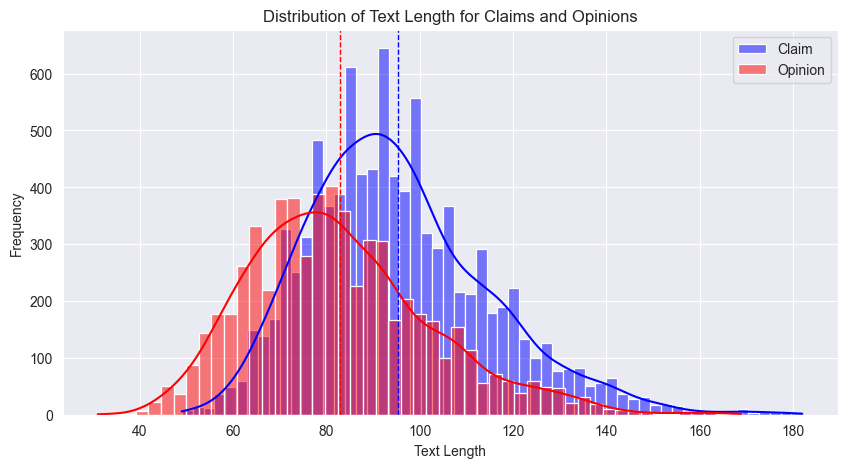

{'claim_status': {'claim': 0, 'opinion': 1}, 'verified_status': {'not verified': 0, 'verified': 1}, 'author_ban_status': {'active': 0, 'banned': 1, 'under review': 2}} 

       claim_status  video_duration_sec  verified_status  author_ban_status  video_view_count  video_like_count  video_share_count  video_download_count  video_comment_count  video_transcription_text_length
count  15639.000000        15639.000000     15639.000000       15639.000000      15639.000000      15639.000000       15639.000000          15639.000000         15639.000000                     15639.000000
mean       0.391841           32.343117         0.052369           0.341006     308488.888164     102530.481616       20343.491783           1279.447087           426.257753                        90.476117
std        0.488177           16.223162         0.222777           0.683536     332224.568011     140798.779212       34296.400688           2146.774317           864.572037                        20.685164
mi

In [5]:
# # Feature Engineering
# Extract the length of each video_transcription_text and add this as a column to the dataframe,
# so that it can be used as a potential feature in the model.
df['video_transcription_text_length'] = df['video_transcription_text'].apply(lambda x: len(x))
df.drop('video_transcription_text', axis=1, inplace=True)

# Calculate the average text_length for claims and opinions.
average_text_length_claim = df[df['claim_status'] == 'claim']['video_transcription_text_length'].mean()
average_text_length_opinion = df[df['claim_status'] == 'opinion']['video_transcription_text_length'].mean()

# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df[df['claim_status'] == 'claim']['video_transcription_text_length'], color='blue', label='Claim', kde=True)
sns.histplot(df[df['claim_status'] == 'opinion']['video_transcription_text_length'], color='red', label='Opinion', kde=True)
plt.axvline(average_text_length_claim, color='blue', linestyle='dashed', linewidth=1)
plt.axvline(average_text_length_opinion, color='red', linestyle='dashed', linewidth=1)
plt.legend()
plt.title('Distribution of Text Length for Claims and Opinions')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

# Encode target and categorical variables.
from sklearn.preprocessing import LabelEncoder

mapping = {}
# Encode the categorical variables
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    mapping[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Display the mapping of the categorical variables
print(mapping, '\n')

# Display descriptive statistics of the dataset after preprocessing
print(df.describe(include='all').to_string(), '\n')

In [6]:
# # Prepare the data_lab for modeling
# Split the dataset into features and target variable
X = df.drop('claim_status', axis=1)
y = df['claim_status']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the training and testing sets
print('Training set shape:', X_train.shape, y_train.shape)
print('Testing set shape:', X_test.shape, y_test.shape, '\n')

# # Train the Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

# # GridSearchCV
from sklearn.model_selection import GridSearchCV

# scoring metrics
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

# Create the hyperparameter grid - search space
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'max_samples': [0.5, 0.7, 0.9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, 
                           verbose=2, scoring=scoring, refit='accuracy')

# Fit the GridSearchCV object
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Display the best parameters
print('Best Parameters:', best_params, '\n')
# Display the best score
print('Best Score:', grid_search.best_score_, '\n')

Training set shape: (10947, 9) (10947,)
Testing set shape: (4692, 9) (4692,) 

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 7, 'max_samples': 0.9, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200} 

Best Score: 0.9949759590814178 



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2883
           1       0.99      1.00      0.99      1809

    accuracy                           1.00      4692
   macro avg       0.99      1.00      1.00      4692
weighted avg       1.00      1.00      1.00      4692
 

Accuracy: 0.9957374254049446, Precision: 0.9957840363901284, Recall: 0.9957374254049446, F1 Score: 0.9957417238787288 



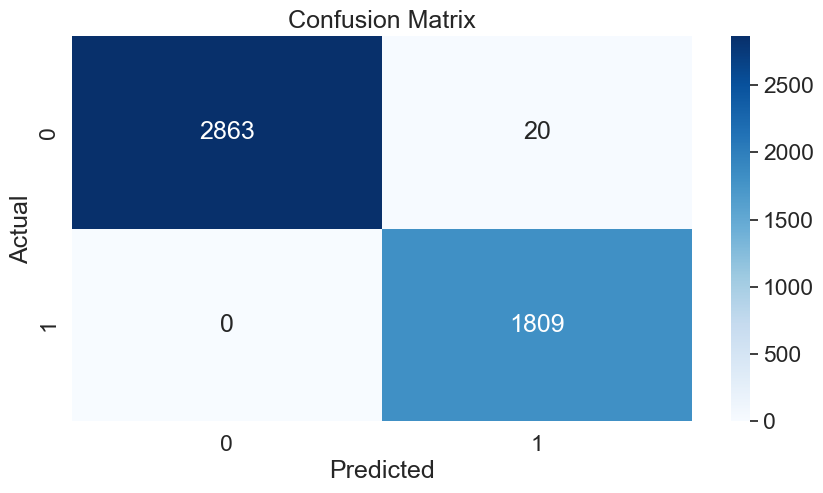

In [7]:
# # Evaluate the model

# Get the best model
best_model = grid_search.best_estimator_

# Predict the test set
y_pred = best_model.predict(X_test)

# Calculate the classification report
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
print('Classification Report:')
print(classification_report(y_test, y_pred), '\n')

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
presicion = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print('Accuracy: {0}, Precision: {1}, Recall: {2}, F1 Score: {3}'.format(accuracy, presicion, recall, f1), '\n')

# Visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 5))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()